In [56]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

def measure_function(i, j, move_type):
    """
    计算路径上的度量值
    move_type: 0 表示从 [i-1, j] 来的, 1 表示从 [i, j-1] 来的, 2 表示从 [i-1, j-1] 来的
    """
    if i == 0 and j == 0:
        return 0  # 起点固定度量值
    if move_type == 0: return i-j
    if move_type == 1: return i-j
    if move_type == 2: return 2*(i-j)

def find_paths(n, i=0, j=0, path=None, moves=None):
    if path is None:
        path = [(0, 0)]
        moves = []
    
    if i == n - 1 and j == n - 1:
        yield path, moves
        return
    
    if i + 1 < n:
        yield from find_paths(n, i + 1, j, path + [(i + 1, j)], moves + [0])
    if j + 1 < n:
        yield from find_paths(n, i, j + 1, path + [(i, j + 1)], moves + [1])
    if i + 1 < n and j + 1 < n:
        yield from find_paths(n, i + 1, j + 1, path + [(i + 1, j + 1)], moves + [2])

def evaluate_paths(n):
    path_scores = {}
    
    for path, moves in find_paths(n):
        score = 0
        for k, (i, j) in enumerate(path):
            move_type = moves[k - 1] if k > 0 else 0  # 第一个点固定度量值 0
            score += measure_function(i, j, move_type)
        
        path_scores[tuple(path)] = score

    return path_scores

def normalize_scores(scores):
    sorted_scores = dict(sorted(scores.items(), key=lambda item: abs(item[1]), reverse=True))
    scale = max(sorted_scores.values())
    return {k: (v) / (scale) for k, v in sorted_scores.items()}
    # return {k: (abs(v)) / (scale) for k, v in sorted_scores.items()}
    

def plot_statistics(scores):
    sorted_scores = sorted(scores.items(), key=lambda x: x[1])
    values = [s[1] for s in sorted_scores]
    
    plt.figure(figsize=(5, 5))
    plt.plot(np.arange(len(values))/len(values), values, marker='o', linestyle='-')


    x = np.linspace(-1, 1, 1000)
    y = np.arctanh(x)/np.pi

    plt.plot((x+1)/2, y, label="arctanh(x)/π")


    plt.xlabel("Path ID")
    plt.ylabel("Normalized Value")
    plt.legend()
    plt.title("Path Value Statistics")
    plt.show()

def plot_paths_on_matrix(scores):
    cmap = plt.colormaps.get_cmap('rainbow')
    plt.figure()
    for k,v in scores.items():
        _x = [_p[0] for _p in k]
        _y = [_p[1] for _p in k]
        plt.plot(_x, _y, color=cmap(abs(v)))
        # print(k[:][1])


In [57]:

# 示例：计算 3x3 矩阵的路径分数并绘图
n = 7
path_scores = evaluate_paths(n)
norm_scores = normalize_scores(path_scores)


C:\Users\Baihm\AppData\Local\Temp\4\ipykernel_552832\2915979866.py:63: RuntimeWarning: divide by zero encountered in arctanh
  y = np.arctanh(x)/np.pi


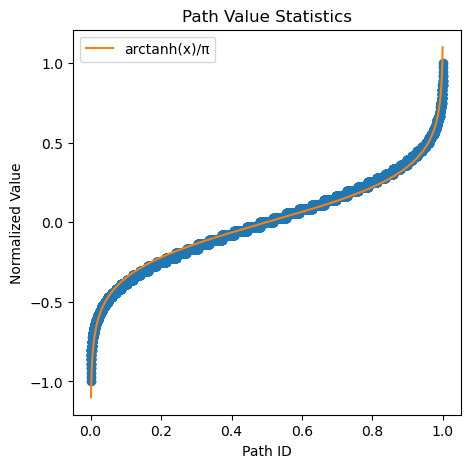

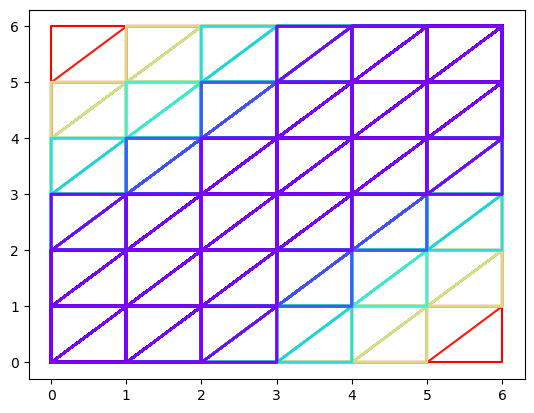

In [58]:
plot_statistics(norm_scores)
plot_paths_on_matrix(norm_scores)


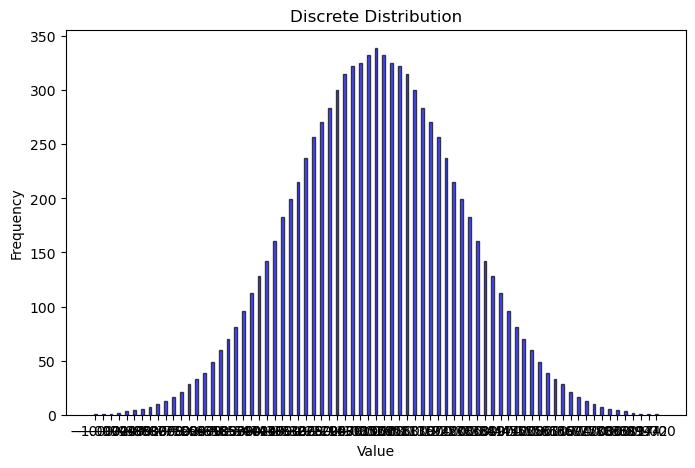

In [60]:
from collections import Counter

# 假设你的离散数据
data = norm_scores.values()
# 统计每个值的频率
freq = Counter(data)

# 提取 x（唯一值）和 y（计数）
x = list(freq.keys())
y = list(freq.values())

# 绘制条形图
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='blue', alpha=0.7, edgecolor='black',width=0.01)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Discrete Distribution")
plt.xticks(x)  # 确保 x 轴显示所有离散值
plt.show()


C:\Users\Baihm\AppData\Local\Temp\4\ipykernel_552832\2516541319.py:5: RuntimeWarning: divide by zero encountered in arctanh
  y = np.arctanh(x)/np.pi


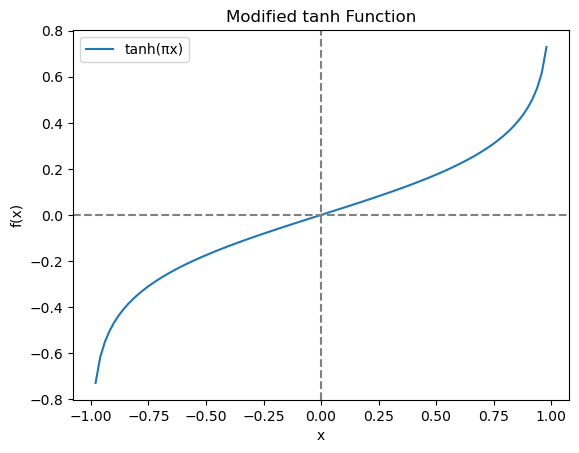

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = np.arctanh(x)/np.pi

plt.plot(x, y, label="tanh(πx)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Modified tanh Function")
plt.legend()
plt.show()
